<a href="https://colab.research.google.com/github/jsmazorra/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Johan_Mazorra_DS13_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
lw_sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
lw_sales

[3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
# Mean
n = len(lw_sales) 
  
get_sum = sum(lw_sales) 
mean = get_sum / n 
  
print("The mean of last week sales is: " + str(mean)) 

The mean of last week sales is: 3052.714285714286


In [0]:
# Variance
var_res = sum((xi - mean) ** 2 for xi in lw_sales) / ((len(lw_sales)-1))

print('The variance of last week sales is:', var_res)

The variance of last week sales is: 214387.90476190473


In [0]:
# Standard Deviation
def stdv(X):
    tot = 0.0
    for x in X:
        tot = tot + (x - mean)**2
    return (tot/len(X))**0.5

print("Standard deviation of last week sales is: ", stdv(lw_sales))

Standard deviation of last week sales is:  428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
# We're going to find the covariance between the two using the numpy function
# for covariance.
import numpy as np
import pandas as pd

lw_sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
lw_cust = [127, 80, 105, 92, 120, 115, 93]
np.cov(lw_sales, lw_cust, ddof=1)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
lw_cust = [127, 80, 105, 92, 120, 115, 93]

t_cust = sum(lw_cust)
ct_cust = len(lw_cust)
mean_cust = t_cust / ct_cust
  
mean_cust

104.57142857142857

In [0]:
differ_mean_cust = []

for customer in lw_cust:
  differ_mean_cust.append((customer - mean_cust) ** 2)

var_cust = sum(differ_mean_cust) / (len(lw_cust)-1)

var_cust

290.95238095238096

In [0]:
stdvt_cust = var_cust ** (1/2)
stdvt_cust

17.057326313123664

In [0]:
covar = 7604.35

covar / (np.std(lw_sales, ddof=1) * np.std(lw_cust, ddof=1))

0.9628330734142393

In [0]:
df_lw_salescust = {"sales": lw_sales, "customers": lw_cust}

df = pd.DataFrame(df_lw_salescust)


df.head(7)

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [0]:
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


In [0]:
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
# Let's start by importing the dataset.

titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv').drop('Unnamed: 0', axis=1)

print(titanic.shape)
titanic.head()

(1310, 15)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
titanic.isnull().sum()

pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [0]:
# Just want to make sure the dtypes to make it easier to seperate them
# from numeric to categorical columns.
titanic.dtypes

pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [0]:
# Now to set apart the numerical columns so we can calculate the variance-covariance
# matrix and correlate
num_columns = ['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body', 'has_cabin_number' ]
cat_columns = ['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest']

titanic_num = titanic.drop(cat_columns, axis=1)

titanic_num.head()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [0]:
titanic_num.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


In [0]:
titanic_num.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

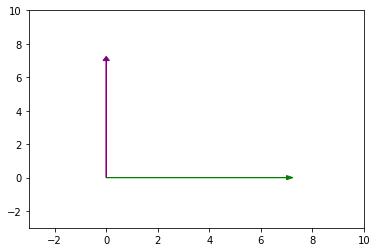

In [0]:
import matplotlib.pyplot as plt

avec = [7, 0]
bvec = [0, 7]

plt.arrow(0, 0, avec[0], avec[1], head_width=.25, head_length=.25, color='green')
plt.arrow(0, 0, bvec[0], bvec[1], head_width=.25, head_length=.25, color='purple')
plt.xlim(-3,10)
plt.ylim(-3,10)
plt.show()

# Perpendicular would be the proper synonym for orthogonal.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = [-5, 3, 7]
b = [6, -8, 2]

np.dot(a, b)

# These vectors are not orthogonal because the dot value is not zero.

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = [2, -15, 6, 20]

np.linalg.norm(c)**2

665.0

In [0]:
np.dot(c, c)

665

In [0]:
sum(np.array(c).T * c)

# What they have in common is that they result in the same value.

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k} 
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4, 12, 11, 9, 2])
f_norm = np.linalg.norm(f)
f_unit = f / f_norm

print(f)
print('Norm of Vector F:', f_norm)
print('Hat of Vector F:', f_unit)

[ 4 12 11  9  2]
Norm of Vector F: 19.131126469708992
Hat of Vector F: [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

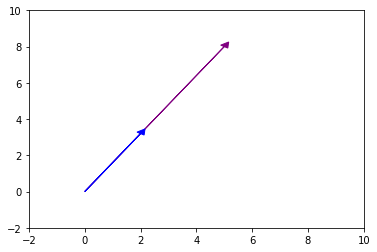

In [0]:
dep_1 = [2, 3.2]
dep_2 = [5, 8]
ind_1 = [3, 6]
ind_2 = [8, 9]

# First, we're going to plot the linearly dependent vectors.
plt.arrow(0, 0, dep_2[0], dep_2[1], head_width=.3, head_length=.3, color='purple')
plt.arrow(0, 0, dep_1[0], dep_1[1], head_width=.3, head_length=.3, color='blue')
plt.xlim(-2, 10)
plt.ylim(-2, 10)
plt.show()

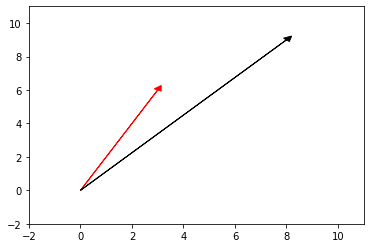

In [0]:
# And now, the two independent vectors.
plt.arrow(0, 0, ind_1[0], ind_1[1], head_width=.3, head_length=.3, color='red')
plt.arrow(0, 0, ind_2[0], ind_2[1], head_width=.3, head_length=.3, color='black')
plt.xlim(-2, 11)
plt.ylim(-2, 11)
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# I imported the random function to get a better idea of the span.
import random

g = np.array([1, 2])
h = np.array([4, 8])

span = []

for i in range(10):
  span.append(random.randint(-5, 5) * g + random.randint(-5, 5) * h)

span = np.array(span)

print(span)
# The span of the vectors fall along the line created by vector g.

[[ -1  -2]
 [ -4  -8]
 [  1   2]
 [-12 -24]
 [ 24  48]
 [-13 -26]
 [ 17  34]
 [ 14  28]
 [-17 -34]
 [  9  18]]


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
l = np.array([1, 2, 3])
m = np.array([-1, 0, 7])
n = np.array([4, 8, 2])

span = []

for i in range(10):
  span.append(random.randint(-5, 5) * l + random.randint(-5, 5) * m + random.randint(-5, 5) * n)

span = np.array(span)

print(span)

# The span of all vectors lie within R^3.

[[ -9  -8  33]
 [ 12  16 -14]
 [ 13  34  49]
 [ -6  -8  22]
 [ 12  30  26]
 [ 20  32 -10]
 [ -8 -16  -4]
 [ 13  20 -21]
 [ -3   2  41]
 [ -4   0  38]]


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



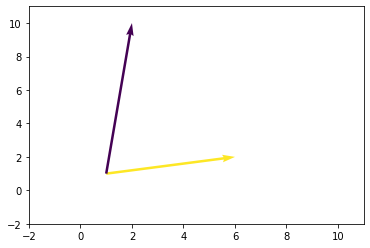

In [0]:
fig, ax = plt.subplots()

basis = np.array([[1, 1, 5, 1],
                          [1, 1, 1, 9]])

x, y, dx, dy = zip(*basis)

ax.quiver(x,y,dx,dy,np.arctan2(dx, dy), angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-2,11])
ax.set_ylim([-2,11])

plt.show()

## 6.2 What does it mean to form a basis?

To form a basis implies a set of linearly independent vectors that range through the entire vector space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

The rank is 3.

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of the vector space spanned by its columns. It tells us what the dimensionality of a matrix is. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

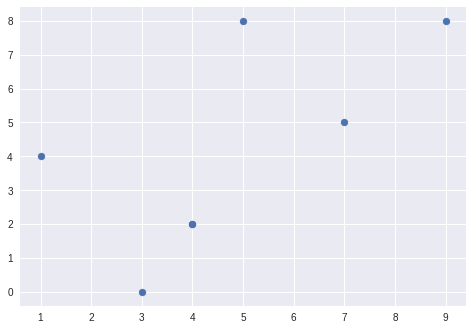

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()